In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('personal_insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
data.drop_duplicates().count()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
region      1337
charges     1337
dtype: int64

In [9]:
data.shape

(1338, 7)

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Numerical:
#### -----------------------
1) 'age'
2) 'bmi'
3) 'children'
4) 'charges'


#### Categorical:
#### ----------------------
1) 'sex'
2) 'smoker'
3) 'region'

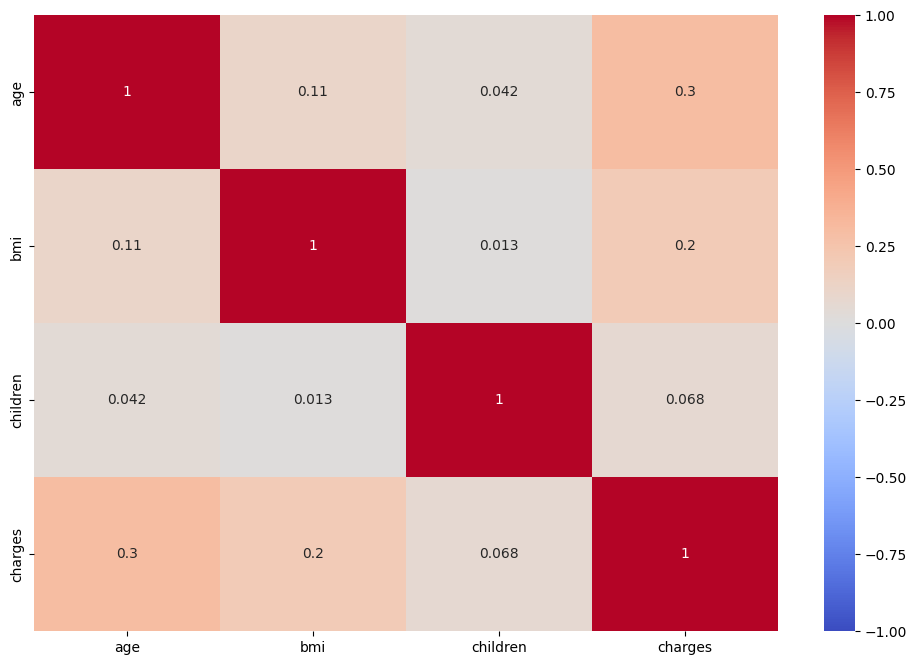

In [11]:
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

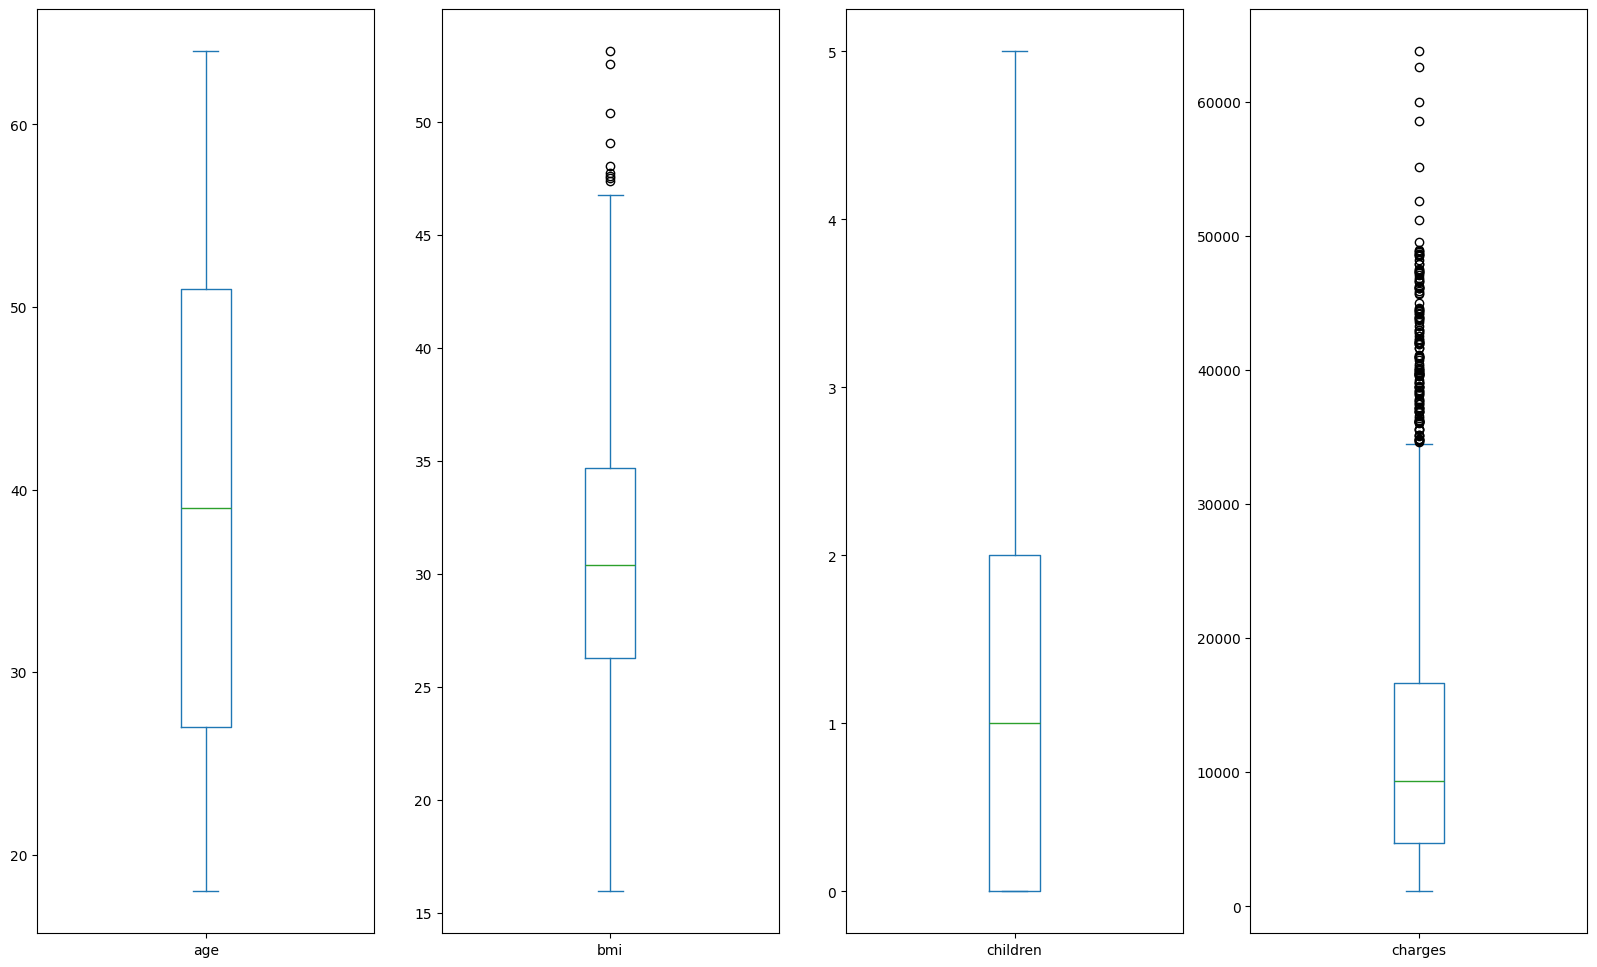

In [12]:
data.plot(kind="box",subplots=True,figsize=(20,12))
plt.show()

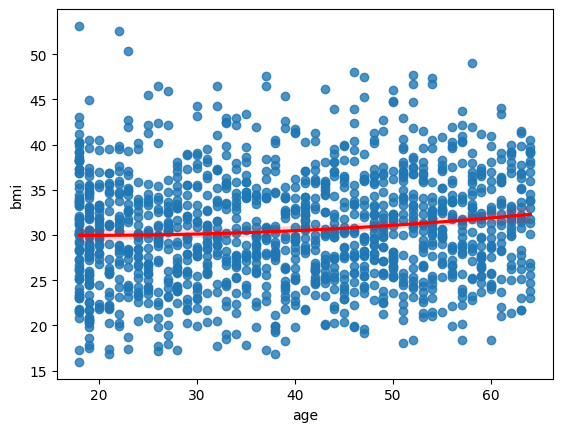

In [13]:
sns.regplot(x="age",
            y="bmi",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

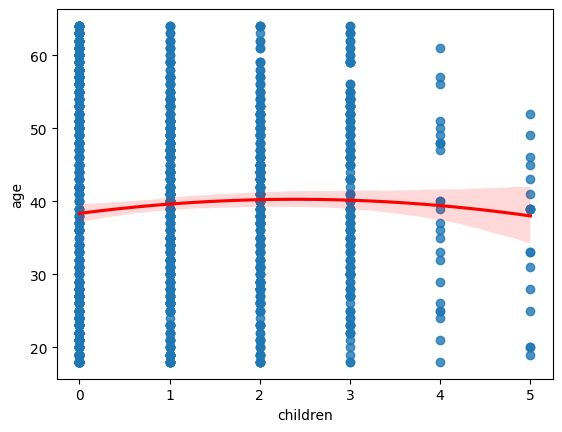

In [14]:
sns.regplot(x="children",
            y="age",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

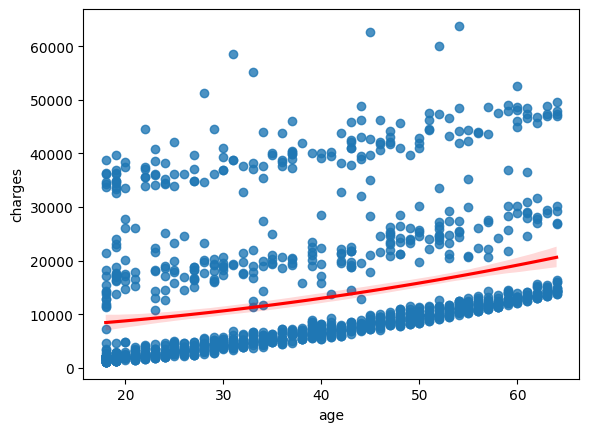

In [15]:
sns.regplot(x="age",
            y="charges",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

<Axes: xlabel='children', ylabel='count'>

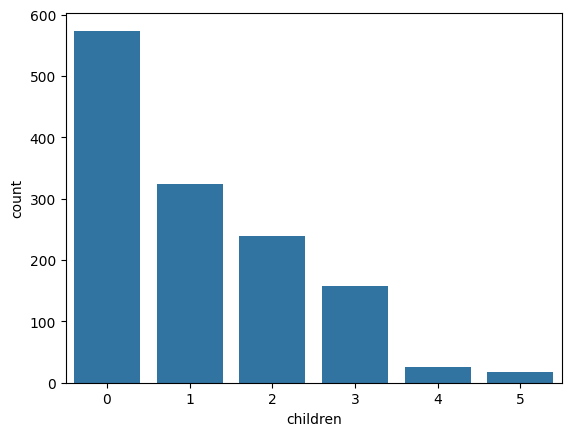

In [16]:
sns.countplot(x="children",data=data)

<Axes: xlabel='age', ylabel='children'>

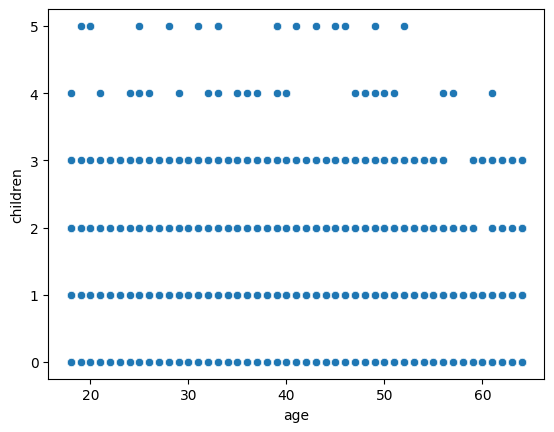

In [17]:
sns.scatterplot(x="age", y="children", data=data)

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["sex","smoker","region"]]=oe.fit_transform(data[["sex","smoker","region"]])

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [21]:
X = data.drop(columns=["charges"])
y = data['charges']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector #pip install mlxtend

In [23]:
#Using mlxtend and Backward elimination method
model = LinearRegression()
sfs = SequentialFeatureSelector(model, k_features='best', forward=False, scoring='r2', cv=5)
sfs.fit(X, y)

print(f"Selected features: {sfs.k_feature_names_}")

Selected features: ('age', 'bmi', 'children', 'smoker', 'region')


In [24]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [25]:
#Using mlxtend and Forward selection method
model = LinearRegression()
sfs = SequentialFeatureSelector(model, k_features='best', forward=True, scoring='r2', cv=5)
sfs.fit(X, y)

print(f"Selected features: {sfs.k_feature_names_}")

Selected features: ('age', 'bmi', 'children', 'smoker', 'region')


In [26]:
data.shape

(1338, 7)

In [29]:
Final_Columns = ['age', 'bmi', 'children', 'smoker', 'region']

In [30]:
Final_Columns = data[Final_Columns]

In [31]:
Final_Columns.head()

,age,bmi,children,smoker,region
0,19,27.900,0,1.0,3.0
1,18,33.770,1,0.0,2.0
2,28,33.000,3,0.0,2.0
3,33,22.705,0,0.0,1.0
4,32,28.880,0,0.0,1.0


In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Final_Columns,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

# Fit a Linear regression model using the selected features
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the test set
y_pred = lr.predict(X_test)

y_pred

array([ 8989.00562463,  7125.96218932, 36996.66479589,  9543.84134195,
       26961.07387871, 10810.32107952,    92.60917639, 17167.6088902 ,
         974.35946057, 11343.55166872, 27865.44602378,  9480.61455066,
        5243.54906883, 38565.41039549, 40459.12825445, 37226.57672148,
       15411.64339299, 36005.2791472 ,  9159.57270279, 31503.58417763,
        3608.51123118, 10039.80120605,  2153.44464457,  7164.62824977,
       11408.67831868, 13079.42909119, 14497.87009186,  6178.24163566,
       10003.27770365,  2130.61310652,  8968.06870773, 13241.13009659,
        4545.51778835,  3361.4094493 ,  4271.77654136, 13180.85940311,
        1723.17209265,  8684.09141973, 33333.42363686, 32635.10642686,
        3658.89910425,  4347.45225453, 14117.98541301, 11570.60440202,
        8838.03749867, 12042.1436263 ,  5296.83516035,  2896.0425041 ,
       35581.83866277,  9224.75424502, 16024.52380232,  2290.39885248,
       12526.3993141 ,  1403.5603577 , 13549.00760522, 12687.00680954,
      

In [33]:
from sklearn.metrics import r2_score #R-Squared
r2_score(y_test,y_pred)

0.7697211527941855

In [34]:
from sklearn.metrics import mean_squared_error #Mean Square Error
mean_squared_error(y_test, y_pred)

33764476.59420976

In [35]:
from sklearn.metrics import mean_absolute_error #Mean Absolute Error
mean_absolute_error(y_test,y_pred)

4151.409812177043

In [36]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

5810.720832582629
